## IMBOR Ontologie overzicht

In dit jupyter notebook wordt een overzicht gegeven van de IMBOR Ontologie. 

De IMBOR Ontologie is door CROW gemaakt in opdracht van het Interprovinciale "Vakberaad Beheer&Bouw". Hierbij is de IMBOR Access database als uitgangspunt genomen. Deze is 'geconverteerd' naar een Linked Data ontologie (of OTL). Doordat de IMBOR Access database de bron is, zijn er een aantal zaken nog niet optimaal ingericht zoals dat in de linked data wereld misschien wenselijk zou zijn. 

jupyter notebook is een python (programmeer) omgeving om interactief code/queries resultaten en documentatie te maken. Als je zelf een jupyter notebook omgeving hebt kun je (als je de juiste python libraries hebt geinstalleerd) dit notebook zelf ook uitvoeren en de queries naar wens aanpassen.


In [1]:
import sys
from rdflib import Graph,URIRef
from gastrodon import LocalEndpoint,one,QName
import pandas as pd

Na het importeren van de libraries om met linked data in Python om te kunnen gaan kunnen we de linked data file laden, in dit geval in 'turtle' formaat:

In [4]:
g=Graph()
g.parse("data/imbor-0.5.2.ttl",format='turtle')
len(g)

50578

### Collecties

In de Ontologie zijn de concepten verdeeld in een aantal Collecties:

In [138]:
q=e.select("""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX groep: <http://linkeddata.crow.nl/imbor/def/groepering/>

SELECT (?memberLabel as ?collecties)
WHERE {
    groep:IMBORHierarchischeCollectie skos:member ?member .
    ?member skos:prefLabel ?memberLabel .
} order by ?member
    """)
q

,collecties
0,IMBOR Objecttypehiërarchie: Objecttypes
1,IMBOR Objecttypehiërarchie: Objecttypegroepen
2,IMBOR Objecttypehiërarchie: Types
3,IMBOR Objecttypehiërarchie: Types extra gedeta...
4,IMBOR Objecttypehiërarchie: Types gedetailleerd


### Objecttypegroepen

De objecttypes zijn opgenomen in 'objecttypegroepen':


In [144]:
q=e.select("""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX groep: <http://linkeddata.crow.nl/imbor/def/groepering/>

SELECT ?objtypegroepURI ?objtypegroepLabel
WHERE {
    groep:Objecttypegroep skos:member ?objtypegroepURI .
    ?objtypegroepURI skos:prefLabel ?objtypegroepLabel .
}
    """)
q

,objtypegroepURI,objtypegroepLabel
0,groep:OBA13,IMBOR Objecttypegroep 'Kunstwerken'
1,groep:OBA21,IMBOR Objecttypegroep 'Putten'
2,groep:OBA46,IMBOR Objecttypegroep 'Assen'
3,groep:OBA2,IMBOR Objecttypegroep 'Groenobjecten'
4,groep:OBA34,IMBOR Objecttypegroep 'Terreindelen'
5,groep:OBA3,IMBOR Objecttypegroep 'Verhardingsobjecten'
6,groep:OBA25,IMBOR Objecttypegroep 'Bakken'
7,groep:OBA31,IMBOR Objecttypegroep 'Informatiemodel'
8,groep:OBA28,IMBOR Objecttypegroep 'Apparaten'
9,groep:OBA10,IMBOR Objecttypegroep 'Leidingen'


### Vakdisciplines

Behalve de hierarchische Collecties zijn de objecttypen ook opgenomen in Vakdisciplines:


In [145]:
q=e.select("""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX groep: <http://linkeddata.crow.nl/imbor/def/groepering/>

SELECT ?VakdisciplineURI ?VakdisciplineLabel
WHERE {
    groep:IMBORVakdisciplineCollectie skos:member ?VakdisciplineURI .
    ?VakdisciplineURI skos:prefLabel ?VakdisciplineLabel .
}
    """)
q

,VakdisciplineURI,VakdisciplineLabel
0,groep:V21,Spelen
1,groep:V22,Sport
2,groep:V46,Tunnels
3,groep:V11,Civiele constructies
4,groep:V25,Verlichting
5,groep:V13,Meubilair
6,groep:V23,Bomen
7,groep:V26,Water
8,groep:V28,Wegen
9,groep:V43,Borden


### Aantallen objecttypen per Vakdiscipline

In [156]:
q=e.select("""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX groep: <http://linkeddata.crow.nl/imbor/def/groepering/>

SELECT ?VakdisciplineLabel (COUNT(?FysiekObjectLabel) as ?count)
WHERE {
# Selecteer de klasse Wegen binnen de groeperingen ...
   
    groep:IMBORVakdisciplineCollectie skos:member ?VakdisciplineURI .
    ?VakdisciplineURI skos:prefLabel ?VakdisciplineLabel .
 # ... en laat de members van die groep zien.                          
    ?VakdisciplineURI skos:member ?FysiekObjectURI .
    ?FysiekObjectURI skos:prefLabel ?FysiekObjectLabel .
}GROUP BY ?VakdisciplineLabel
ORDER BY desc(?count)
    """)
q

,count
VakdisciplineLabel,
Civiele constructies,96
Meubilair,85
Sport,75
Riolering,62
Verkeersregelinstallaties,53
Verkeer,42
Tunnels,40
Spelen,28
Water,26


Text(0,0.5,'')

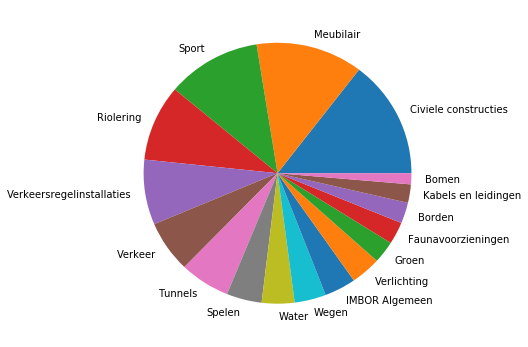

In [157]:
q["count"].plot.pie(figsize=(6,6)).set_ylabel('')

### Objecttypen in een Vakdiscipline

Je kunt ook de objecttypen opvragen die in een Vakdiscipline 'meedoen' In onderstaand voorbeeld voor de discipline wegen.

In [143]:
q=e.select("""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?VakdisciplineURI ?VakdisciplineLabel ?FysiekObjectURI ?FysiekObjectLabel
WHERE {
# Selecteer de klasse Wegen binnen de groeperingen ...
    BIND ("Wegen"@nl-NL as ?VakdisciplineLabel)
    ?VakdisciplineURI a skos:Collection;
    skos:prefLabel ?VakdisciplineLabel;
 # ... en laat de members van die groep zien.                          
    skos:member ?FysiekObjectURI .
    ?FysiekObjectURI skos:prefLabel ?FysiekObjectLabel .
}
ORDER BY ?FysiekObjectLabel
    """)
q

,VakdisciplineURI,VakdisciplineLabel,FysiekObjectURI,FysiekObjectLabel
0,groep:V28,Wegen,imbor:OBB851,As
1,groep:V28,Wegen,imbor:OBB64,Balustrade
2,groep:V28,Wegen,imbor:OBB212,Band
3,groep:V28,Wegen,imbor:OBB400,Beheerobject
4,groep:V28,Wegen,imbor:OBB575,Bijzondere tegel
5,groep:V28,Wegen,imbor:OBB213,Blok
6,groep:V28,Wegen,imbor:OBB622,Bordes
7,groep:V28,Wegen,imbor:OBB417,Constructielagen
8,groep:V28,Wegen,imbor:OBB889,Constructieonderdeel
9,groep:V28,Wegen,imbor:OBB305,Doorvoergat


### Objecttypes

De IMBOR Ontologie sluit aan op de __NTA8035__. De eerste query laat zien welke objecttypen een directe subklasse zijn van 
Fysiek Object uit de NTA.

In [7]:
e=LocalEndpoint(g)

q=e.select("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nta8035: <https://w3id.org/def/basicsemantics-owl#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT (?thing AS ?FysiekObjectURI) ?FysiekObjectLabel ?FysiekObjectDefinitie 
WHERE {
# Selecteer alleen klassen ...
    ?thing a rdfs:Class ; 
# ... die een directe subklasse zijn van NTA8035 Fysiek object ...
           rdfs:subClassOf nta8035:PhysicalObject ; 
# ... en een preferred label hebben ...
           skos:prefLabel ?FysiekObjectLabel ; 
# ... en een definitie hebben.
           skos:definition ?FysiekObjectDefinitie .
}
ORDER BY ?FysiekObjectLabel
""")
q

,FysiekObjectURI,FysiekObjectLabel,FysiekObjectDefinitie
0,imbor:OBB400,Beheerobject,Verzamelobject - niveau 1
1,imbor:OBB751,Constructielagen,Hulpobject om de constructielagen onder bijvoo...
2,imbor:OBB417,Constructielagen,Constructielaag van of onder een Verhardingsob...
3,imbor:OBB724,Doorvaart sluis,"Kunstmatige, beweegbare waterkering die de ver..."
4,imbor:OBB723,Opening kunstwerk,Ruimte tussen twee overbruggingsonderdelen of ...
5,imbor:OBB747,Rand groenobject,Hulpobject om de randen van een groenobject te...
6,imbor:OBB769,Rand verharding,Verhardingsstrook langs de verhoogde kantopslu...
7,imbor:OBB748,Soortnaam groenobject,Hulpobject om soortnamen aan een groenobject t...
8,imbor:OBB1009,Soortnaam terreindeel,Hulpobject om soortnamen aan een terreindeel t...
9,imbor:OBB1007,Verkeersintensiteit,Hulpobject om de verkeersintensiteit per progn...


Beheerobject is het 'hoogste' niveau, hieronder vallen alle objecttypen van imbor.
Een verschil met de Access database is de manier waarop er omgegaan is met type, type_gedetailleerd etc. In de IMBOR Access Database zijn dit eigenschappen van een objecttype. In de ontologie zijn dit subklassen van het bovenliggende type...

Dus als we opvragen hoeveel objecttypen (klassen) er in de imbor ontologie zitten zijn dat er een hoop:

In [29]:
q=e.select("""
  SELECT  (COUNT(*) AS ?cnt) {
       ?s rdfs:subClassOf* nta8035:PhysicalObject .
    }
""")
q

,cnt
0,3942


### Eigenschappen

We kunnen ook een query maken om de eigenschappen van een objecttype op te vragen...
Het is wel een behoorlijk uitgebreide query omdat van een objecttype ook de bovenliggende objecttypes bevraagd worden voor eigenschappen die 'overgeerfd' worden.

In [125]:
q=e.select("""
        SELECT ?FysiekObjectURI ?FysiekObjectLabel ?ObjecttypeLabel ?EigenschapURI ?EigenschapLabel
WHERE { 

# ... vul hieronder het objecttype in waar de eigenschappen voor opgevraagd worden:
        BIND ("Boom"@nl-NL as ?FysiekObjectLabel)

            ?FysiekObjectURI rdfs:subClassOf* nta8035:PhysicalObject ; 
                             skos:prefLabel ?FysiekObjectLabel .
# ... en die een SHACL shape hebben, inclusief overgeerfde.
            ?SHACLNodeShape sh:targetClass/^rdfs:subClassOf* ?FysiekObjectURI .
            ?SHACLNodeShape sh:property ?SHACLPropertyShape .
# Laat de relatie zien van de SHACL Shape, naar de eigenschap.
            ?SHACLPropertyShape sh:path ?EigenschapURI .
            ?EigenschapURI skos:prefLabel ?EigenschapLabel .
            ?SHACLNodeShape sh:targetClass ?Objecttype .
            ?Objecttype skos:prefLabel ?ObjecttypeLabel .
# En filter de hasPart relaties eruit om alleen echte eigenschappen te zien.
        MINUS { ?SHACLPropertyShape sh:path nta8035:hasPart }
}
ORDER BY ?ObjecttypeLabel ?FysiekObjectLabel ?EigenschapLabel
    """)
q

,FysiekObjectURI,FysiekObjectLabel,ObjecttypeLabel,EigenschapURI,EigenschapLabel
0,imbor:OBB4,Boom,Beheerobject,imborp:P204,Beheerder
1,imbor:OBB4,Boom,Beheerobject,imborp:P205,Beheerder gedetailleerd
2,imbor:OBB4,Boom,Beheerobject,imborp:P270,Beheergebied
3,imbor:OBB4,Boom,Beheerobject,imborp:P704,Beheervak
4,imbor:OBB4,Boom,Beheerobject,imborp:P217,Eigenaar
5,imbor:OBB4,Boom,Beheerobject,imborp:P331,Eigenaar gedetailleerd
6,imbor:OBB4,Boom,Beheerobject,imborp:P274,Gebiedstype
7,imbor:OBB4,Boom,Beheerobject,imborp:P523,Gebruiksfunctie
8,imbor:OBB4,Boom,Beheerobject,imborp:P771,Geometrie
9,imbor:OBB4,Boom,Beheerobject,imborp:P374,ID uit oude beheerindeling


### relaties

objecttypen hebben in sommige gevallen ook relaties met elkaar

In [127]:
q=e.select("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nta8035: <https://w3id.org/def/basicsemantics-owl#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX sh: <http://www.w3.org/ns/shacl#>

SELECT ?FysiekObjectURI ?FysiekObjectLabel ?FysiekObjectmetOnderdeelURI ?FysiekObjectmetOnderdeelLabel
WHERE {
# Selecteer alleen fysieke objecten ...
    ?FysiekObjectURI rdfs:subClassOf* nta8035:PhysicalObject ; 
         			  skos:prefLabel ?FysiekObjectLabel .
# ... en die een SHACL shape hebben ...
            ?SHACLNodeShape sh:targetClass ?FysiekObjectURI .
    		?SHACLNodeShape sh:property [ 
# ... met de nta8035:hasPart property (en dus een onderdeel relatie zijn)  ...
        				sh:path nta8035:hasPart;
# ... en laat het onderdeel zien.
            			sh:class ?FysiekObjectmetOnderdeelURI ].
    		?FysiekObjectmetOnderdeelURI skos:prefLabel ?FysiekObjectmetOnderdeelLabel .
}
ORDER BY ?FysiekObjectLabel ?FysiekObjectmetOnderdeelLabel
    """)
q

,FysiekObjectURI,FysiekObjectLabel,FysiekObjectmetOnderdeelURI,FysiekObjectmetOnderdeelLabel
0,imbor:OBB402,Groenobject,imbor:OBB751,Constructielagen
1,imbor:OBB402,Groenobject,imbor:OBB747,Rand groenobject
2,imbor:OBB402,Groenobject,imbor:OBB748,Soortnaam groenobject
3,imbor:OBB414,Kunstwerk,imbor:OBB723,Opening kunstwerk
4,imbor:OBB396,Sluis,imbor:OBB724,Doorvaart sluis
5,imbor:OBB433,Terreindeel,imbor:OBB1009,Soortnaam terreindeel
6,imbor:OBB401,Verhardingsobject,imbor:OBB417,Constructielagen
7,imbor:OBB401,Verhardingsobject,imbor:OBB769,Rand verharding
8,imbor:OBB725,Wegas,imbor:OBB1007,Verkeersintensiteit
9,imbor:OBB725,Wegas,imbor:OBB785,Verkeerstelling
